In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from dolfin import *
from mshr import *

parameters['reorder_dofs_serial'] = False
parameters['allow_extrapolation'] = True

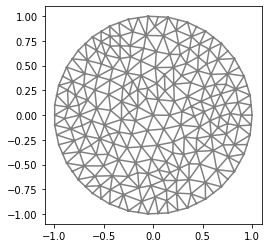

In [3]:
domain = Circle(Point(.0,.0), 1)
disk_mesh = generate_mesh(domain, 10)
plot(disk_mesh)

In [30]:
FS_disk = FunctionSpace(disk_mesh, 'Lagrange', 2)

u = TrialFunction(FS_disk)
v = TestFunction(FS_disk)

In [31]:
def disk_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), 1, 5e-2)

BC_disk = DirichletBC(FS_disk, Constant(1), disk_boundary)

In [38]:
left_integrand = inner(grad(v),grad(u))*dx
f =  Constant(2)
right_integrand = f*v*dx

In [39]:
sol = Function(FS_disk)
solve(left_integrand == right_integrand, sol, BC_disk)

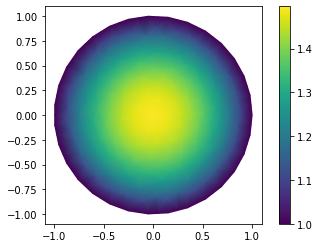

In [40]:
p = plot(sol)
plt.colorbar(p)
plt.show()

In [46]:
sol.vector()

In [42]:
N=10
u_mat1 = np.array(sol.vector()).reshape(N+1, N+1)
X, Y = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})
p = ax1.plot_surface(X, Y, u_mat1, rstride=4, cstride=4, linewidth=0, cmap=mpl.cm.get_cmap("Reds"))
cb = fig.colorbar(p, ax=ax1, shrink=0.5)
ax1.set_xlabel(r"$x_1$", fontsize=18)
ax1.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

ValueError: cannot reshape array of size 847 into shape (11,11)

In [8]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary condition
u0 = Function(V)
bc = DirichletBC(V, u0, "x[0] < DOLFIN_EPS || x[0] > 1.0 - DOLFIN_EPS")

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)",
               degree=1)
g = Expression("sin(5*x[0])", degree=1)
a = inner(grad(u), grad(v))*dx()
L = f*v*dx() + g*v*ds()

# Define function for the solution
u = Function(V)

# Define goal functional (quantity of interest)
M = u*dx()

# Define error tolerance
tol = 1.e-5

# Solve equation a = L with respect to u and the given boundary
# conditions, such that the estimated error (measured in M) is less
# than tol
problem = LinearVariationalProblem(a, L, u, bc)
solver = AdaptiveLinearVariationalSolver(problem, M)
solver.parameters["error_control"]["dual_variational_solver"]["linear_solver"] = "cg"
solver.parameters["error_control"]["dual_variational_solver"]["symmetric"] = True
solver.solve(tol)


In [9]:
solver.summary()


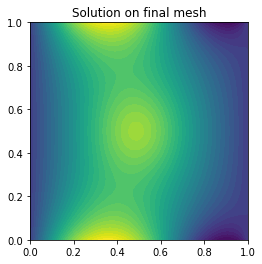

In [10]:
# Plot solution(s)
plot(u.root_node(), title="Solution on initial mesh")
plot(u.leaf_node(), title="Solution on final mesh")

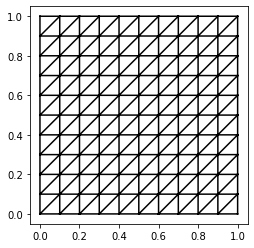

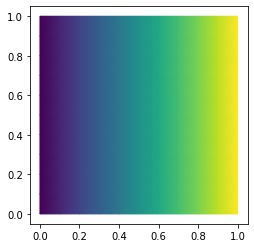

In [14]:
from dolfin import *
import matplotlib.pyplot as plt
import matplotlib.tri as tri

def mesh2triang(mesh):
    xy = mesh.coordinates()
    return tri.Triangulation(xy[:, 0], xy[:, 1], mesh.cells())

def plot(obj):
    plt.gca().set_aspect('equal')
    if isinstance(obj, Function):
        mesh = obj.function_space().mesh()
        if (mesh.geometry().dim() != 2):
            raise(AttributeError)
        if obj.vector().size() == mesh.num_cells():
            C = obj.vector().array()
            plt.tripcolor(mesh2triang(mesh), C)
        else:
            C = obj.compute_vertex_values(mesh)
            plt.tripcolor(mesh2triang(mesh), C, shading='gouraud')
    elif isinstance(obj, Mesh):
        if (obj.geometry().dim() != 2):
            raise(AttributeError)
        plt.triplot(mesh2triang(obj), color='k')

# example
mesh = UnitSquareMesh(10, 10)
plt.figure()
plot(mesh)
plt.show()
Q = FunctionSpace(mesh, "CG", 1)
F = interpolate(Expression("x[0]", degree=1), Q)
plot(F)
plt.show()

In [8]:
# Define function space
P2 = VectorElement('P', tetrahedron, 2)
P1 = FiniteElement('P', tetrahedron, 1)
#TH = P2 * P1
MH = MixedElement(P1, P2)
W = FunctionSpace(mesh, MH)



In [10]:
TrialFunctions(W)

AttributeError: 'FunctionSpace' object has no attribute '_ufl_element'

In [ ]:
# Define variational problem
(u, p) = TrialFunctions(W)
(v, q) = TestFunctions(W)
a = inner(grad(u), grad(v))*dx - p*div(v)*dx + div(u)*q*dx
L = dot(f, v)*dx

# Compute solution
w = Function(W)
solve(a == L, w, [bc1, bc0])